In [12]:
import os
import tarfile

# Path to your uploaded file
uploaded_file_path = '/content/lfw.tgz'

# Step 1: Extract the .tgz file to a folder
extract_dir = '/content/lfw_dataset'  # Define the folder where the dataset will be extracted

# Open the tar file and extract it
with tarfile.open(uploaded_file_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

# Check if extraction was successful by listing the files
print("Files extracted to:", extract_dir)
print(os.listdir(extract_dir))


Files extracted to: /content/lfw_dataset
['lfw']


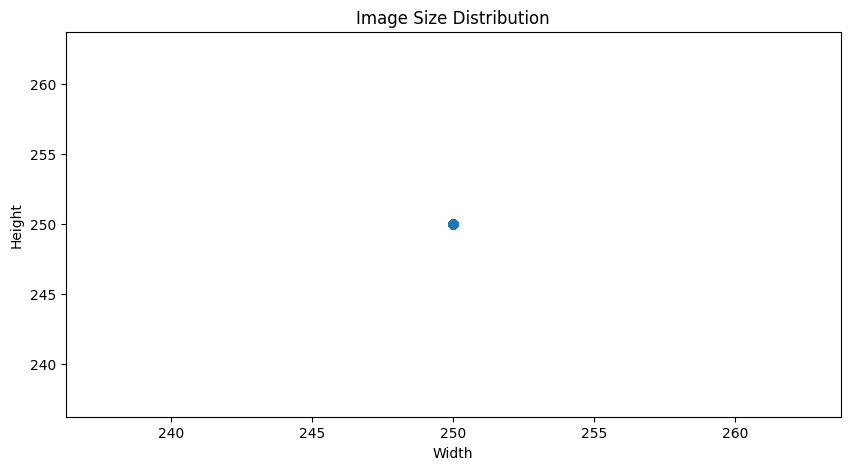

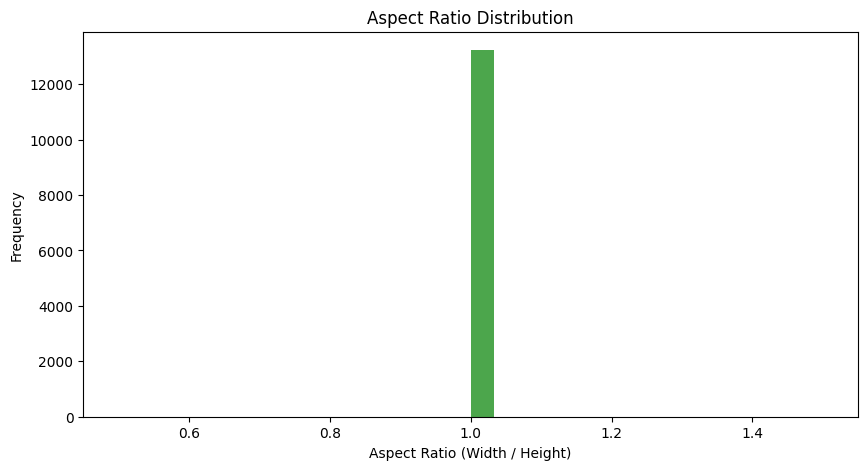

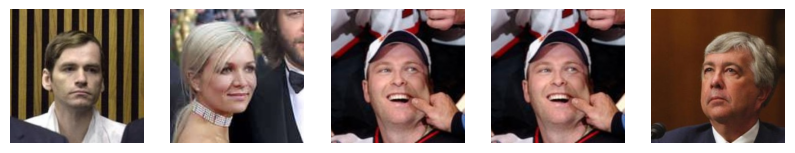

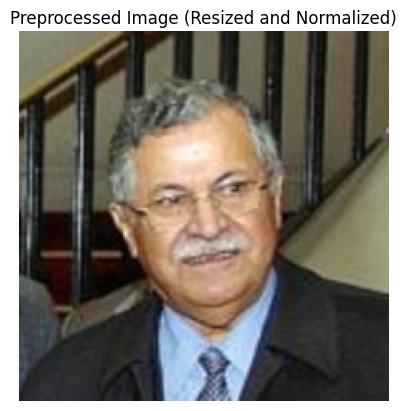

In [13]:
# Import necessary libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Path to your dataset folder after extraction
dataset_path = '/content/lfw_dataset/lfw'  # Adjusted path to where images are stored

# Step 1: Collect basic information about the dataset (image sizes, aspect ratios)
image_sizes = []
aspect_ratios = []

# Loop through the dataset folder to read image files (recursively search in subfolders)
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):  # Ensures it's a subfolder
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Ensure it's an image
                try:
                    img = Image.open(img_path)

                    # Get image size (width, height)
                    width, height = img.size
                    image_sizes.append((width, height))

                    # Compute aspect ratio (width / height)
                    aspect_ratios.append(width / height)
                except Exception as e:
                    print(f"Error opening image {img_path}: {e}")

# Convert image_sizes to numpy array for easier analysis
image_sizes = np.array(image_sizes)

# Step 2: Visualize the data

# 2a: Plot image size distribution (width vs height)
plt.figure(figsize=(10, 5))
plt.scatter(image_sizes[:, 0], image_sizes[:, 1], alpha=0.5)
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

# 2b: Plot aspect ratio distribution
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=30, color='green', alpha=0.7)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.show()

# Step 3: Display random sample images
def show_sample_images(dataset_path, num_samples=5):
    sample_images = []

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            files = os.listdir(folder_path)
            image_files = [os.path.join(folder_path, f) for f in files if f.endswith(".jpg") or f.endswith(".png")]
            if len(image_files) > 0:
                # Add only as many images as needed, ensuring we don't go over the num_samples
                sample_images += np.random.choice(image_files, min(num_samples, len(image_files))).tolist()

    # Limit the number of images to the number of subplots available
    num_samples_to_display = min(len(sample_images), num_samples)

    # Plot the sample images
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(sample_images[:num_samples_to_display]):  # Ensure no more than num_samples images
        img = Image.open(img_path)
        plt.subplot(1, num_samples_to_display, i + 1)  # Adjust subplot size based on actual number of images
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Show random sample images from the dataset
show_sample_images(dataset_path)

# Step 4: Data Preprocessing (Resizing and Normalization)

# Define a preprocessing function
def preprocess_image(image, target_size=(224, 224)):
    # Resize the image to the target size
    img_resized = image.resize(target_size)

    # Convert image to a numpy array and normalize pixel values to [0, 1]
    img_array = np.array(img_resized) / 255.0

    return img_array

# Example: Load and preprocess an image
sample_image_path = os.path.join(dataset_path, "Jalal_Talabani", "Jalal_Talabani_0001.jpg")  # Adjust based on your folder structure
image = Image.open(sample_image_path)
preprocessed_image = preprocess_image(image)

# Display the preprocessed image
plt.imshow(preprocessed_image)
plt.title("Preprocessed Image (Resized and Normalized)")
plt.axis('off')
plt.show()


In [14]:
import os

# Check the structure of the extracted dataset
dataset_path = '/content/lfw_dataset'  # Path to the extracted folder

# Print the folder structure
for root, dirs, files in os.walk(dataset_path):
    print("Root folder:", root)
    print("Sub-folders:", dirs)
    print("Files:", files[:5])  # Print the first 5 files to avoid flooding output
    print("-" * 50)


Streaming output truncated to the last 5000 lines.
Root folder: /content/lfw_dataset/lfw/Keith_Urban
Sub-folders: []
Files: ['Keith_Urban_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw_dataset/lfw/Jesse_James
Sub-folders: []
Files: ['Jesse_James_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw_dataset/lfw/Princess_Hisako
Sub-folders: []
Files: ['Princess_Hisako_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw_dataset/lfw/Charles_Chandler_IV
Sub-folders: []
Files: ['Charles_Chandler_IV_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw_dataset/lfw/Matt_Morris
Sub-folders: []
Files: ['Matt_Morris_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw_dataset/lfw/Davis_Love_III
Sub-folders: []
Files: ['Davis_Love_III_0001.jpg']
--------------------------------------------------
Root folder: /content/lfw